In [1]:
# 解壓縮至當前目錄(暫存)
import zipfile
path = "/content/drive/MyDrive/06_緯育/14_深度學習/train.zip"
f = zipfile.ZipFile(path)
f.extractall() # 若()內填路徑可存到雲端

In [2]:
# 測試glob功能
import glob
glob.glob("test/*.txt")
glob.glob("test/*/*.jpg")
glob.glob("test/*")
sorted(glob.glob("test/*")) # 排序
# 若要看全部底下檔案 (用迴圈)

[]

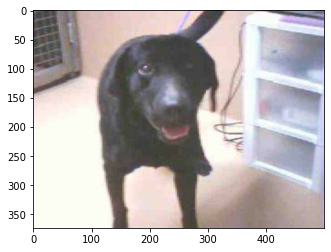

In [3]:
# 看一下圖片: 每張不同大小
import glob
import matplotlib.pyplot as plt
from PIL import Image
fs = glob.glob("train/*")
plt.imshow(Image.open(fs[20]))

In [4]:
import random
import pandas as pd
dogs = glob.glob("train/dog.*")
random.shuffle(dogs)
cats = glob.glob("train/cat.*")
random.shuffle(cats)
train = pd.DataFrame({
    "path":dogs[:900] + cats[:900],
    "target":[0] * 900 + [1] * 900
})
validate = pd.DataFrame({
    "path":dogs[900:950] + cats[900:950],
    "target":[0] * 50 + [1] * 50
})
test = pd.DataFrame({
    "path":dogs[950:1000] + cats[950:1000],
    "target":[0] * 50 + [1] * 50
})

In [5]:
test

,path,target
0,train/dog.1146.jpg,0
1,train/dog.4915.jpg,0
2,train/dog.3236.jpg,0
3,train/dog.4890.jpg,0
4,train/dog.4935.jpg,0
...,...,...
95,train/cat.231.jpg,1
96,train/cat.11017.jpg,1
97,train/cat.1138.jpg,1
98,train/cat.10816.jpg,1


In [6]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
vgg.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import BatchNormalization 
# 固定特徵
for l in vgg.layers:
    l.trainable = False
# 寫自己的網路層
layers = [
    BatchNormalization(), # 回頭調整,因為輸出有問題.
    GlobalAveragePooling2D(),
    Dense(2, activation="softmax")
]
layers = vgg.layers + layers
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [19]:
# 設定損失函數
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [20]:
# np操作測試
import numpy as np
# 待補

In [21]:
# https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py
fs = glob.glob("train/*")
target = fs[20]

# 預處理測試(要照你偷來的模型做)
# 後面會一起寫在funtion裡
from tensorflow.keras.applications.vgg16 import preprocess_input
img = Image.open(target).resize((224, 224)).convert("RGB")
img_np = preprocess_input(np.array(img))
print(img_np)

[[[-31.939003  -25.779     -35.68     ]
  [-28.939003  -23.779     -33.68     ]
  [-21.939003  -18.779     -28.68     ]
  ...
  [ 46.060997   -3.7789993 -14.68     ]
  [ 44.060997   -4.7789993 -15.68     ]
  [ 44.060997   -3.7789993 -14.68     ]]

 [[ -6.939003   -2.7789993 -12.68     ]
  [ -2.939003   -0.7789993  -9.68     ]
  [ -3.939003   -3.7789993 -12.68     ]
  ...
  [ 40.060997   -6.7789993 -17.68     ]
  [ 37.060997   -9.778999  -20.68     ]
  [ 35.060997   -9.778999  -21.68     ]]

 [[  2.060997   -0.7789993  -9.68     ]
  [ -5.939003   -9.778999  -17.68     ]
  [-18.939003  -23.779     -32.68     ]
  ...
  [ 36.060997   -8.778999  -18.68     ]
  [ 38.060997   -5.7789993 -15.68     ]
  [ 38.060997   -5.7789993 -15.68     ]]

 ...

 [[139.061     137.22101   128.32     ]
  [139.061     137.22101   128.32     ]
  [139.061     137.22101   128.32     ]
  ...
  [ 64.061      47.221      59.32     ]
  [ 83.061      45.221      60.32     ]
  [ 89.061      47.221      63.32     ]]

 [

In [22]:
import numpy as np
x_train = np.array(train["path"])
y_train = np.array(train["target"])
x_validate = np.array(validate["path"])
y_validate = np.array(validate["target"])
x_test = np.array(test["path"])
y_test = np.array(test["target"])

In [23]:
from PIL import Image
from tensorflow.keras.applications.vgg16 import preprocess_input
def get_data(x, y, batch=None):
    # 如果不是None, 那代表是數字(20), 隨機20個idx
    # 如果是None, 那就沒有隨機, 拿全部
    if batch is not None:
        idx = np.random.randint(0, len(x), size=batch)
        x, y = x[idx], y[idx]
    # img_pre: preprocess過後的圖片
    # img_ori: 沒有preprocess的圖片
    img_pre, img_ori = [], []
    # 走過我的每一個path
    for p in x:
        # 讀取圖片並且預處理
        img = Image.open(p).convert("RGB").resize((224, 224))
        img = np.array(img)
        img_pre.append(preprocess_input(img))
        img_ori.append(img)
    # 回傳(預處理過後圖片, 沒處理圖片, 答案)
    return (np.array(img_pre), np.array(img_ori), y)
# 使用範例
x, x_ori, y = get_data(x_train, y_train, 10)
print(x.shape)
print(x_ori.shape)
print(y.shape)
# print(x)

(10, 224, 224, 3)
(10, 224, 224, 3)
(10,)


In [24]:
# validate和test全部讀出來
xv, xv_ori, yv = get_data(x_validate, y_validate)
xt, xt_ori, yt = get_data(x_test, y_test)
print(xv.shape)
print(xt.shape)

(100, 224, 224, 3)
(100, 224, 224, 3)


In [25]:
# 我沒有使用fit: 因為使用fit你一定要把全部圖都讀好(現實世界不太可能)
# 真的自己一步一步來: train_on_batch, test_on_batch
for i in range(50):
    x, _, y = get_data(x_train, y_train, batch=20)
    result = model.train_on_batch(x, y)
    print("train:", result)
    result = model.test_on_batch(xv, yv)
    print("validate:", result)
    print("-" * 15, i, "end", "-" * 15)

train: [0.6990645527839661, 0.550000011920929]
validate: [2.319749355316162, 0.47999998927116394]
--------------- 0 end ---------------
train: [0.7113405466079712, 0.6000000238418579]
validate: [1.6818369626998901, 0.5]
--------------- 1 end ---------------
train: [0.7638853192329407, 0.4000000059604645]
validate: [1.3800346851348877, 0.5400000214576721]
--------------- 2 end ---------------
train: [0.7381076216697693, 0.5]
validate: [1.177619457244873, 0.5699999928474426]
--------------- 3 end ---------------
train: [0.7728840112686157, 0.3499999940395355]
validate: [1.013197898864746, 0.6000000238418579]
--------------- 4 end ---------------
train: [0.6775332689285278, 0.5]
validate: [0.8984817266464233, 0.6100000143051147]
--------------- 5 end ---------------
train: [0.6835992932319641, 0.5]
validate: [0.8052413463592529, 0.6399999856948853]
--------------- 6 end ---------------
train: [0.5384418368339539, 0.699999988079071]
validate: [0.7393606305122375, 0.6499999761581421]
------

In [26]:
# 改成有EarlyStoppoing跟存檔
'''
minloss, patience = float("inf"), 0 
for i in range(50):
    x, _, y = get_data(x_train, y_train, batch=20)
    result = model.train_on_batch(x, y)
    print("train:", result)
    result = model.test_on_batch(xv, yv)
    print("validate:", result)
    if result[0] < minloss:
        minloss, patience = result[0], 0
        model.save("xxx.h5")
    else:
        patience = patience + 1
    if patience == 5:
        break
    print("-" * 15, i, "end", "-" * 15)
'''

'\nminloss, patience = float("inf"), 0 \nfor i in range(50):\n    x, _, y = get_data(x_train, y_train, batch=20)\n    result = model.train_on_batch(x, y)\n    print("train:", result)\n    result = model.test_on_batch(xv, yv)\n    print("validate:", result)\n    if result[0] < minloss:\n        minloss, patience = result[0], 0\n        model.save("xxx.h5")\n    else:\n        patience = patience + 1\n    if patience == 5:\n        break\n    print("-" * 15, i, "end", "-" * 15)\n'

In [27]:
# 看一下數值有沒有問題
model.predict(x)

array([[0.8272788 , 0.17272115],
       [0.0048121 , 0.9951879 ],
       [0.0815646 , 0.9184354 ],
       [0.38594747, 0.61405253],
       [0.98813266, 0.01186733],
       [0.39011434, 0.6098857 ],
       [0.17697318, 0.82302684],
       [0.8230082 , 0.17699182],
       [0.9216238 , 0.07837617],
       [0.9697105 , 0.03028949],
       [0.03011833, 0.9698816 ],
       [0.5393013 , 0.4606987 ],
       [0.90678173, 0.09321824],
       [0.41346866, 0.58653134],
       [0.07784729, 0.9221527 ],
       [0.26743358, 0.7325664 ],
       [0.07609096, 0.923909  ],
       [0.07534072, 0.9246593 ],
       [0.03011833, 0.9698816 ],
       [0.94787097, 0.05212907]], dtype=float32)

In [28]:
pre = model.predict(xt).argmax(axis=1)
model.evaluate(xt, yt)

4/4 [==============================] - 1s 92ms/step - loss: 0.2376 - accuracy: 0.9100


[0.23758186399936676, 0.9100000262260437]

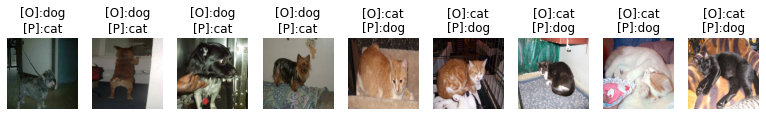

In [29]:
# 看一下錯在哪
import numpy as np
# 找出True(預測錯誤)的位置
idx = np.nonzero(pre != yt)[0]
idx = idx[:200]
pre_false_label = yt[idx]
pre_false_pre = pre[idx]
pre_false_img = xt_ori[idx]
# !
trans = ["dog", "cat"]
plt.figure(figsize=(15, 5))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[pre_false_label[i]], trans[pre_false_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])

url:https://images.twgreatdaily.com/images/image/Q-f/Q-fzNm8BMH2_cNUgqHnt.jpg
dog 的機率: 0.033
cat 的機率: 0.967


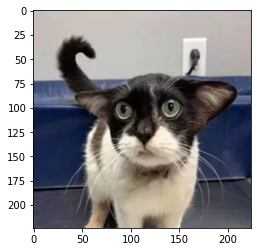

In [34]:
# 測試網路上易混淆的照片
# https://images.twgreatdaily.com/images/image/Q-f/Q-fzNm8BMH2_cNUgqHnt.jpg
# https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS5_lI25-CbQ8e5WYfEKMys3ai640VqMeKupQ&usqp=CAU
# https://m.uchongs.com/img/p/2002/4017619/0_630_357.jpg
# https://cdn.pixabay.com/photo/2016/02/23/12/50/dog-1217513__480.jpg
import requests
# pillow
from PIL import Image
url = input("url:")
response = requests.get(url, stream=True)
img = Image.open(response.raw).convert("RGB").resize((224, 224))
img_np = np.array(img).reshape(1, 224, 224, 3)
# (32, 32, 3) -> (1, 32, 32, 3)
img_np_pre = preprocess_input(img_np)
proba = model.predict(img_np_pre)[0]
for p, n in zip(proba, trans):
    print(n, "的機率:", round(p, 3))
plt.imshow(img)